In [1]:
pip install scikit-learn==0.23.2


     |████████████████████████████████| 6.8 MB 24.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import requests

In [3]:
df=pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')

In [4]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48187 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48187 non-null  object 
 1   temp                 48187 non-null  float64
 2   rain_1h              48187 non-null  float64
 3   snow_1h              48187 non-null  float64
 4   clouds_all           48187 non-null  int64  
 5   weather_main         48187 non-null  object 
 6   weather_description  48187 non-null  object 
 7   date_time            48187 non-null  object 
 8   traffic_volume       48187 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.7+ MB


In [8]:
# split column into multiple columns by delimiter 
df[['Date', 'Time']]=df['date_time'].str.split(' ', expand=True)
df.drop(['date_time'], axis=1, inplace=True)

In [9]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Date,Time
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,12:00:00
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,13:00:00
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543,2018-09-30,19:00:00
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,2018-09-30,20:00:00
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,2018-09-30,21:00:00
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,1450,2018-09-30,22:00:00


In [10]:
import datetime
import calendar
from datetime import date

def day(d):
  year,month,date=(int(x) for x in d.split('-'))
  week=datetime.date(year,month,date)
  return week.strftime("%A")

def month(d):
  year,month,date=(int(x) for x in d.split('-'))
  #week=datetime.date(year,month,date)
  return month

def year(d):
  year,month,date=(int(x) for x in d.split('-'))
  #week=datetime.date(year,month,date)
  return year

def day_hrs(t):
  hr=int(t.split(':')[0])
  return hr

  # if(hr<=6 and hr>=22):
  #   return 'Night'
  # elif(hr<22 and hr>=17):
  #   return 'Evening'
  # elif(hr<17 and hr>=12):
  #   return 'Afternoon'
  # else:
  #   return 'Morning'   


In [11]:
df['day_of_week']=df['Date'].transform(day)
df['hour_of_day']=df['Time'].transform(day_hrs)
df['month_of_year']=df['Date'].transform(month)
df['year']=df['Date'].transform(year)

In [12]:
df['holiday']=df['holiday'].apply(lambda x:0 if x=='None' else 1)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Date,Time,day_of_week,hour_of_day,month_of_year,year
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00,Tuesday,9,10,2012
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00,Tuesday,10,10,2012
2,0,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00,Tuesday,11,10,2012
3,0,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,12:00:00,Tuesday,12,10,2012
4,0,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,13:00:00,Tuesday,13,10,2012


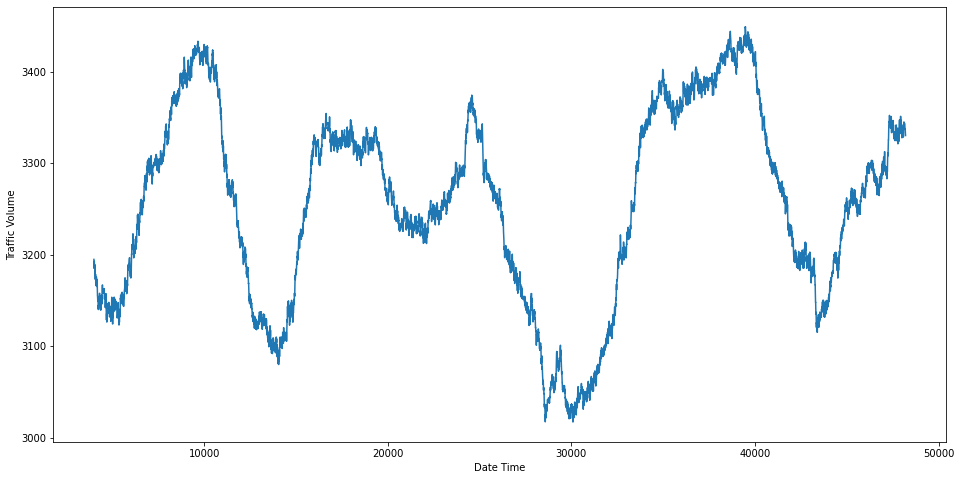

In [13]:
import matplotlib.pyplot as plt
#df.set_index(df['Date'],inplace = True)
df.sort_index()['traffic_volume'].rolling(4000).mean().plot(figsize = (16,8))
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
df.head()

In [14]:
!pip install feature-engine

     |████████████████████████████████| 205 kB 24.0 MB/s 
     |████████████████████████████████| 9.8 MB 47.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [15]:
from feature_engine.encoding import CountFrequencyEncoder
#sorted according to prob of occurance of each string in the dataset
encoder=CountFrequencyEncoder(encoding_method='frequency',variables=['weather_main']) 

encoder.fit(df)
encoder.encoder_dict_
df=encoder.transform(df)
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Date,Time,day_of_week,hour_of_day,month_of_year,year
0,0,288.28,0.0,0.0,40,0.314566,scattered clouds,5545,2012-10-02,09:00:00,Tuesday,9,10,2012
1,0,289.36,0.0,0.0,75,0.314566,broken clouds,4516,2012-10-02,10:00:00,Tuesday,10,10,2012
2,0,289.58,0.0,0.0,90,0.314566,overcast clouds,4767,2012-10-02,11:00:00,Tuesday,11,10,2012
3,0,290.13,0.0,0.0,90,0.314566,overcast clouds,5026,2012-10-02,12:00:00,Tuesday,12,10,2012
4,0,291.14,0.0,0.0,75,0.314566,broken clouds,4918,2012-10-02,13:00:00,Tuesday,13,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,0.314566,broken clouds,3543,2018-09-30,19:00:00,Sunday,19,9,2018
48200,0,282.76,0.0,0.0,90,0.314566,overcast clouds,2781,2018-09-30,20:00:00,Sunday,20,9,2018
48201,0,282.73,0.0,0.0,90,0.021437,proximity thunderstorm,2159,2018-09-30,21:00:00,Sunday,21,9,2018
48202,0,282.09,0.0,0.0,90,0.314566,overcast clouds,1450,2018-09-30,22:00:00,Sunday,22,9,2018


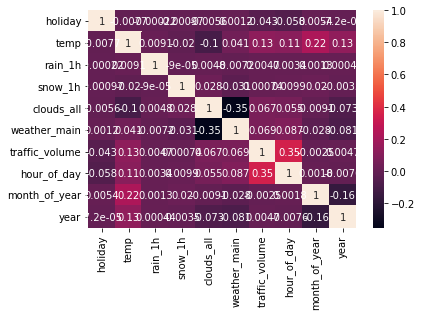

In [16]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [17]:
from sklearn.preprocessing import MinMaxScaler   #normalized
scaler = MinMaxScaler(feature_range=(0,1))
df[['rain_1h','snow_1h','clouds_all']]=scaler.fit_transform(df[['rain_1h','snow_1h','clouds_all']])
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Date,Time,day_of_week,hour_of_day,month_of_year,year
0,0,288.28,0.0,0.0,0.40,0.314566,scattered clouds,5545,2012-10-02,09:00:00,Tuesday,9,10,2012
1,0,289.36,0.0,0.0,0.75,0.314566,broken clouds,4516,2012-10-02,10:00:00,Tuesday,10,10,2012
2,0,289.58,0.0,0.0,0.90,0.314566,overcast clouds,4767,2012-10-02,11:00:00,Tuesday,11,10,2012
3,0,290.13,0.0,0.0,0.90,0.314566,overcast clouds,5026,2012-10-02,12:00:00,Tuesday,12,10,2012
4,0,291.14,0.0,0.0,0.75,0.314566,broken clouds,4918,2012-10-02,13:00:00,Tuesday,13,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,0.75,0.314566,broken clouds,3543,2018-09-30,19:00:00,Sunday,19,9,2018
48200,0,282.76,0.0,0.0,0.90,0.314566,overcast clouds,2781,2018-09-30,20:00:00,Sunday,20,9,2018
48201,0,282.73,0.0,0.0,0.90,0.021437,proximity thunderstorm,2159,2018-09-30,21:00:00,Sunday,21,9,2018
48202,0,282.09,0.0,0.0,0.90,0.314566,overcast clouds,1450,2018-09-30,22:00:00,Sunday,22,9,2018


In [18]:
df=pd.get_dummies(df,columns=['day_of_week'])

In [19]:
df=pd.get_dummies(df,columns=['hour_of_day'])
df=pd.get_dummies(df,columns=['month_of_year'])
df=pd.get_dummies(df,columns=['year'])
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Date,Time,...,month_of_year_10,month_of_year_11,month_of_year_12,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,0,288.28,0.0,0.0,0.40,0.314566,scattered clouds,5545,2012-10-02,09:00:00,...,1,0,0,1,0,0,0,0,0,0
1,0,289.36,0.0,0.0,0.75,0.314566,broken clouds,4516,2012-10-02,10:00:00,...,1,0,0,1,0,0,0,0,0,0
2,0,289.58,0.0,0.0,0.90,0.314566,overcast clouds,4767,2012-10-02,11:00:00,...,1,0,0,1,0,0,0,0,0,0
3,0,290.13,0.0,0.0,0.90,0.314566,overcast clouds,5026,2012-10-02,12:00:00,...,1,0,0,1,0,0,0,0,0,0
4,0,291.14,0.0,0.0,0.75,0.314566,broken clouds,4918,2012-10-02,13:00:00,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,0.75,0.314566,broken clouds,3543,2018-09-30,19:00:00,...,0,0,0,0,0,0,0,0,0,1
48200,0,282.76,0.0,0.0,0.90,0.314566,overcast clouds,2781,2018-09-30,20:00:00,...,0,0,0,0,0,0,0,0,0,1
48201,0,282.73,0.0,0.0,0.90,0.021437,proximity thunderstorm,2159,2018-09-30,21:00:00,...,0,0,0,0,0,0,0,0,0,1
48202,0,282.09,0.0,0.0,0.90,0.314566,overcast clouds,1450,2018-09-30,22:00:00,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# df.replace({
# 'Clouds' :0,
# 'Clear'           :1,
# 'Mist'            :2,
# 'Rain'            :3,
# 'Snow'            :4,
# 'Drizzle'         :5,
# 'Haze'            :6,
# 'Thunderstorm'    :7,
# 'Fog'             :8,
# 'Smoke'           :9,
# 'Squall'          :10},inplace=True)

In [21]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# wd_tran = encoder.fit_transform(df['weather_description'])
# wd_tran_unique=np.unique(wd_tran)
# wd_unique=np.unique(df['weather_description'])
# encoded = dict(zip(wd_unique, wd_tran_unique))

# df.replace(encoded,inplace=True)
# df

In [22]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 25.9 MB 1.6 MB/s 
     |████████████████████████████████| 10.9 MB 17.0 MB/s 
     |████████████████████████████████| 596 kB 30.7 MB/s 
     |████████████████████████████████| 102 kB 12.2 MB/s 
     |████████████████████████████████| 690 kB 49.7 MB/s 
     |████████████████████████████████| 4.7 MB 76.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 812 kB 53.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=1fcf31b9e5360462278d5a2c405563ea7071191edb581706e4d0ed85cda24572
  Stored in directory: /tmp/pip-ephem-wheel-cache-fg1n65sw/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=885991502cfa7d293022014cf91fa97d3cf73ae3f0178d3630bcabe374eac443
  Stored in directory: /r

In [23]:
from pandas_profiling import ProfileReport

In [24]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative= True)

In [25]:
#profile.to_notebook_iframe()

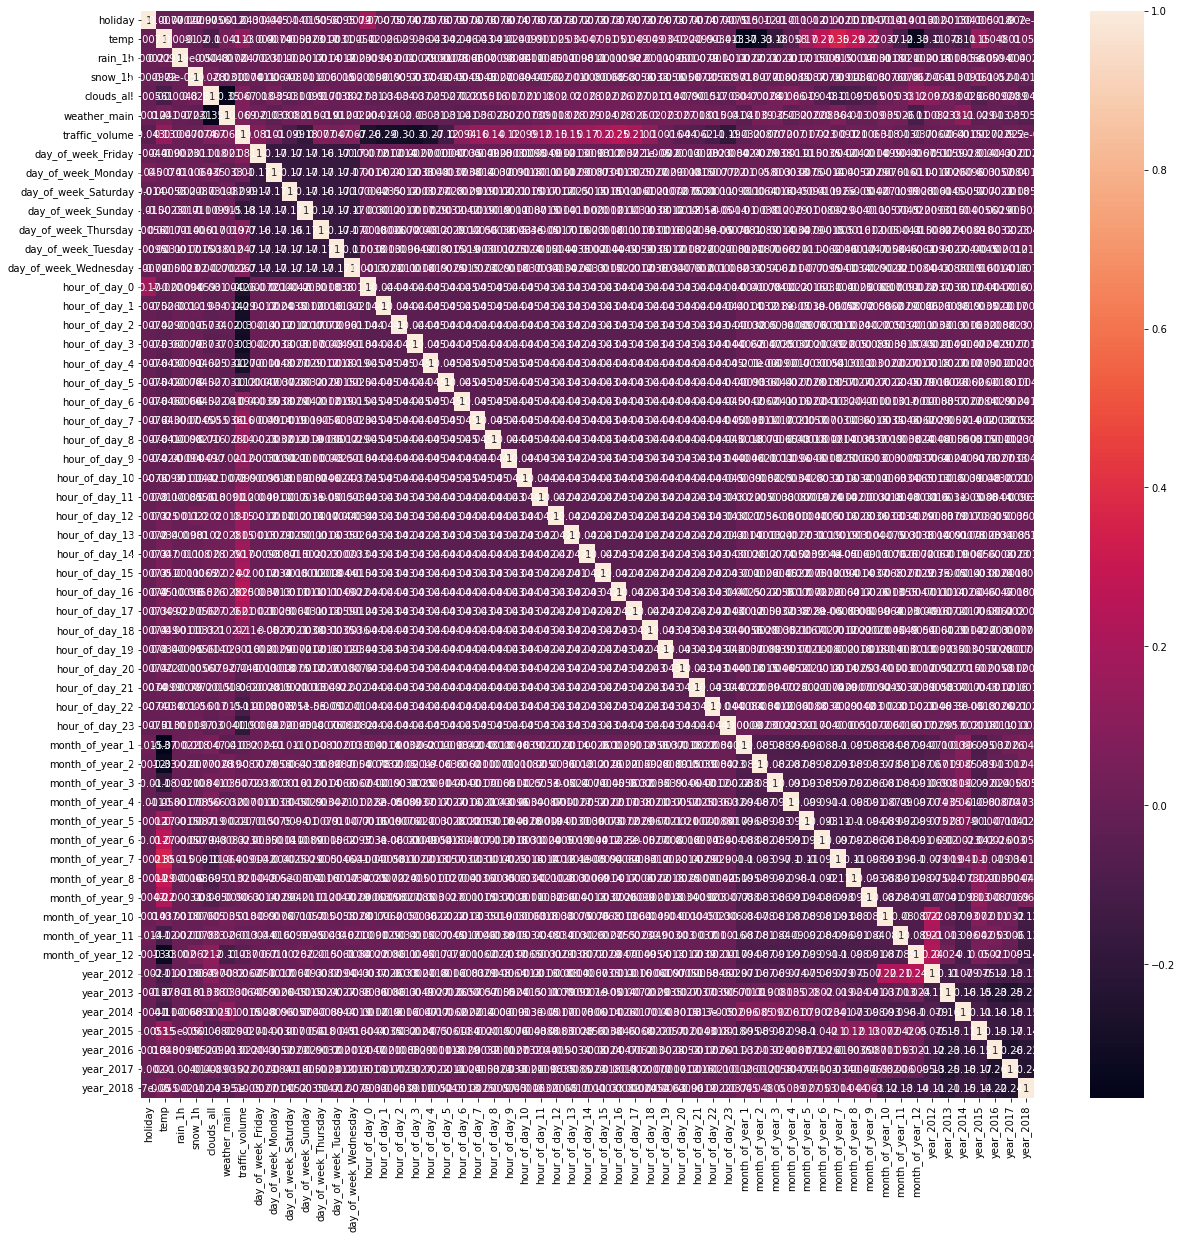

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [27]:

#duplicate values
#normalization
#heat map corr methods
#models--> 1.linear 
#cassandra
#logging 

In [28]:
df.drop(['rain_1h','snow_1h','Date','Time','weather_description'], axis=1, inplace=True)


In [29]:
df

,holiday,temp,clouds_all,weather_main,traffic_volume,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,...,month_of_year_10,month_of_year_11,month_of_year_12,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,0,288.28,0.40,0.314566,5545,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,289.36,0.75,0.314566,4516,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,289.58,0.90,0.314566,4767,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,290.13,0.90,0.314566,5026,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,291.14,0.75,0.314566,4918,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.75,0.314566,3543,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
48200,0,282.76,0.90,0.314566,2781,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
48201,0,282.73,0.90,0.021437,2159,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
48202,0,282.09,0.90,0.314566,1450,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df

,holiday,temp,clouds_all,weather_main,traffic_volume,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,...,month_of_year_10,month_of_year_11,month_of_year_12,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,0,288.28,0.40,0.314566,5545,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,289.36,0.75,0.314566,4516,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,289.58,0.90,0.314566,4767,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,290.13,0.90,0.314566,5026,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,291.14,0.75,0.314566,4918,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.75,0.314566,3543,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
48200,0,282.76,0.90,0.314566,2781,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
48201,0,282.73,0.90,0.021437,2159,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
48202,0,282.09,0.90,0.314566,1450,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df.isnull().sum()

holiday                  0
temp                     0
clouds_all               0
weather_main             0
traffic_volume           0
day_of_week_Friday       0
day_of_week_Monday       0
day_of_week_Saturday     0
day_of_week_Sunday       0
day_of_week_Thursday     0
day_of_week_Tuesday      0
day_of_week_Wednesday    0
hour_of_day_0            0
hour_of_day_1            0
hour_of_day_2            0
hour_of_day_3            0
hour_of_day_4            0
hour_of_day_5            0
hour_of_day_6            0
hour_of_day_7            0
hour_of_day_8            0
hour_of_day_9            0
hour_of_day_10           0
hour_of_day_11           0
hour_of_day_12           0
hour_of_day_13           0
hour_of_day_14           0
hour_of_day_15           0
hour_of_day_16           0
hour_of_day_17           0
hour_of_day_18           0
hour_of_day_19           0
hour_of_day_20           0
hour_of_day_21           0
hour_of_day_22           0
hour_of_day_23           0
month_of_year_1          0
m

In [32]:
df['traffic_volume']

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48187, dtype: int64

In [33]:
reordered=['holiday', 'temp', 'clouds_all', 'weather_main','day_of_week_Monday','day_of_week_Tuesday',
       'day_of_week_Wednesday','day_of_week_Thursday','day_of_week_Friday','day_of_week_Saturday',
       'day_of_week_Sunday','hour_of_day_0', 'hour_of_day_1', 'hour_of_day_2', 'hour_of_day_3',
       'hour_of_day_4', 'hour_of_day_5', 'hour_of_day_6', 'hour_of_day_7',
       'hour_of_day_8', 'hour_of_day_9', 'hour_of_day_10', 'hour_of_day_11',
       'hour_of_day_12', 'hour_of_day_13', 'hour_of_day_14', 'hour_of_day_15',
       'hour_of_day_16', 'hour_of_day_17', 'hour_of_day_18', 'hour_of_day_19',
       'hour_of_day_20', 'hour_of_day_21', 'hour_of_day_22', 'hour_of_day_23',
       'month_of_year_1', 'month_of_year_2', 'month_of_year_3',
       'month_of_year_4', 'month_of_year_5', 'month_of_year_6',
       'month_of_year_7', 'month_of_year_8', 'month_of_year_9',
       'month_of_year_10', 'month_of_year_11', 'month_of_year_12', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018','traffic_volume']
df=df.reindex(columns=reordered)

In [34]:
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y=df['traffic_volume']
x=df.drop(['traffic_volume'], axis=1)
x_trn, x_tst, y_trn, y_tst = train_test_split(x,y,test_size=0.3, random_state=100)
x_trn


,holiday,temp,clouds_all,weather_main,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday,...,month_of_year_10,month_of_year_11,month_of_year_12,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
21432,0,270.16,0.01,0.277751,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26663,0,292.68,0.90,0.314566,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
21746,0,281.55,0.40,0.117708,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1069,0,280.33,0.90,0.314566,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
19431,0,280.72,0.90,0.117708,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,0,294.23,0.90,0.021437,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
79,0,279.22,0.40,0.314566,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
12119,0,253.40,0.01,0.277751,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14147,0,286.89,0.75,0.117708,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
y_trn

21432    6744
26663    4772
21746    1091
1069     2239
19431     956
         ... 
16304     760
79       2450
12119    1653
14147    2740
38421    1892
Name: traffic_volume, Length: 33730, dtype: int64

In [36]:
#model=LinearRegression()
#model.fit(x_trn,y_trn)

#print(model.coef_)

In [37]:
#predicted_y=model.predict(x_tst)
#predicted_y

In [38]:
#y_tst

In [39]:
#model.score(x_tst,y_tst)

In [40]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor()
#import xgboost as xgb
#regressor= xgb.XGBRegressor(objective="reg:squarederror",  n_estimators=5000, random_state=42)
regressor.fit(x_trn,y_trn)

RandomForestRegressor()

In [41]:
y_pred = regressor.predict(x_tst)

In [42]:
import sklearn.metrics as sm
sm.r2_score(y_tst, y_pred)

0.9513699290949398

In [43]:
# from sklearn import tree
# plt.figure(figsize=(15,10))
# tree.plot_tree(regressor, filled=True)

In [44]:
df

,holiday,temp,clouds_all,weather_main,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday,...,month_of_year_11,month_of_year_12,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,traffic_volume
0,0,288.28,0.40,0.314566,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5545
1,0,289.36,0.75,0.314566,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4516
2,0,289.58,0.90,0.314566,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4767
3,0,290.13,0.90,0.314566,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5026
4,0,291.14,0.75,0.314566,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.75,0.314566,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3543
48200,0,282.76,0.90,0.314566,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2781
48201,0,282.73,0.90,0.021437,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2159
48202,0,282.09,0.90,0.314566,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1450


In [45]:
encoder.encoder_dict_

{'weather_main': {'Clear': 0.27775126071347045,
  'Clouds': 0.3145661692987735,
  'Drizzle': 0.03776952290036732,
  'Fog': 0.018926266420403844,
  'Haze': 0.02822337974972503,
  'Mist': 0.12345653391993691,
  'Rain': 0.11770809554444145,
  'Smoke': 0.0004150497022018387,
  'Snow': 0.059663394691514306,
  'Squall': 8.300994044036773e-05,
  'Thunderstorm': 0.021437317118724968}}

In [46]:
df.columns


Index(['holiday', 'temp', 'clouds_all', 'weather_main', 'day_of_week_Monday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'day_of_week_Thursday',
       'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'hour_of_day_0', 'hour_of_day_1', 'hour_of_day_2', 'hour_of_day_3',
       'hour_of_day_4', 'hour_of_day_5', 'hour_of_day_6', 'hour_of_day_7',
       'hour_of_day_8', 'hour_of_day_9', 'hour_of_day_10', 'hour_of_day_11',
       'hour_of_day_12', 'hour_of_day_13', 'hour_of_day_14', 'hour_of_day_15',
       'hour_of_day_16', 'hour_of_day_17', 'hour_of_day_18', 'hour_of_day_19',
       'hour_of_day_20', 'hour_of_day_21', 'hour_of_day_22', 'hour_of_day_23',
       'month_of_year_1', 'month_of_year_2', 'month_of_year_3',
       'month_of_year_4', 'month_of_year_5', 'month_of_year_6',
       'month_of_year_7', 'month_of_year_8', 'month_of_year_9',
       'month_of_year_10', 'month_of_year_11', 'month_of_year_12', 'year_2012',
       'year_2013', 'year_2014',

In [47]:
x.columns

Index(['holiday', 'temp', 'clouds_all', 'weather_main', 'day_of_week_Monday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'day_of_week_Thursday',
       'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'hour_of_day_0', 'hour_of_day_1', 'hour_of_day_2', 'hour_of_day_3',
       'hour_of_day_4', 'hour_of_day_5', 'hour_of_day_6', 'hour_of_day_7',
       'hour_of_day_8', 'hour_of_day_9', 'hour_of_day_10', 'hour_of_day_11',
       'hour_of_day_12', 'hour_of_day_13', 'hour_of_day_14', 'hour_of_day_15',
       'hour_of_day_16', 'hour_of_day_17', 'hour_of_day_18', 'hour_of_day_19',
       'hour_of_day_20', 'hour_of_day_21', 'hour_of_day_22', 'hour_of_day_23',
       'month_of_year_1', 'month_of_year_2', 'month_of_year_3',
       'month_of_year_4', 'month_of_year_5', 'month_of_year_6',
       'month_of_year_7', 'month_of_year_8', 'month_of_year_9',
       'month_of_year_10', 'month_of_year_11', 'month_of_year_12', 'year_2012',
       'year_2013', 'year_2014',

In [48]:
# reordered=['holiday', 'temp', 'clouds_all', 'weather_main','day_of_week_Monday','day_of_week_Tuesday',
#        'day_of_week_Wednesday','day_of_week_Thursday','day_of_week_Friday','day_of_week_Saturday',
#        'day_of_week_Sunday','hour_of_day_0', 'hour_of_day_1', 'hour_of_day_2', 'hour_of_day_3',
#        'hour_of_day_4', 'hour_of_day_5', 'hour_of_day_6', 'hour_of_day_7',
#        'hour_of_day_8', 'hour_of_day_9', 'hour_of_day_10', 'hour_of_day_11',
#        'hour_of_day_12', 'hour_of_day_13', 'hour_of_day_14', 'hour_of_day_15',
#        'hour_of_day_16', 'hour_of_day_17', 'hour_of_day_18', 'hour_of_day_19',
#        'hour_of_day_20', 'hour_of_day_21', 'hour_of_day_22', 'hour_of_day_23',
#        'month_of_year_1', 'month_of_year_2', 'month_of_year_3',
#        'month_of_year_4', 'month_of_year_5', 'month_of_year_6',
#        'month_of_year_7', 'month_of_year_8', 'month_of_year_9',
#        'month_of_year_10', 'month_of_year_11', 'month_of_year_12', 'year_2012',
#        'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
#        'year_2018','traffic_volume']
# df=df.reindex(columns=reordered)

In [49]:
def model_param(holiday,weather,time,date,temp,clouds):

  #holiday
  if(holiday=='Yes'):
    holiday_in=[1]
  else:
    holiday_in=[0]

  #time
  time_t=int(time.split(":")[0])
  time_in=[0]*24
  time_in[time_t]=1

  #date
  # year,month,date=[int(x) for x in date.split('-')]
  year=int(date.split('-')[0])
  yr1=year
  month=int(date.split('-')[1])
  m1=month
  date=int(date.split('-')[2])
  d1=date
  month_in=[0]*12
  month_in[month-1]=1
  year_in=[0]*7
  year_in[year-2012]=1
  #print(type(year))


 #day
 #date formatting
  date1=datetime.date(yr1,m1,d1)
  week=date1.weekday()
  #week=convert.weekday()
  print(week)
  week_in=[0]*7
  week_in[week]=1
  

 #temp
  temp_in=[temp]

 #clouds_all
  clouds_in=[float(clouds/100)]

 #weather_main
  weather_dict=encoder.encoder_dict_['weather_main']
  weather_in=[weather_dict[weather]]


  return np.array(holiday_in + temp_in + clouds_in + weather_in + week_in + time_in +month_in + year_in).reshape(1,-1)

In [50]:
print(model_param('Yes','Fog','12:00','2013-05-2',288.6,50))

3
[[1.00000000e+00 2.88600000e+02 5.00000000e-01 1.89262664e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [51]:
yy=regressor.predict(model_param('Yes','Fog','12:00','2013-05-2',288.6,50))
yy

3


array([5160.46])

In [52]:
# !pip install joblib
# import joblib
# #this file is the model used for flask
# joblib.dump(regressor,'saved_model.pkl')  #save the model and file name

import pickle
with open('saved__model.pickle','wb') as f:
    pickle.dump(regressor,f)